## Задание 1
1. Импортируйте библиотеки pandas, numpy и matplotlib.
2. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
3. Создайте датафреймы X и y из этих данных.
4. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
5. Масштабируйте данные с помощью StandardScaler.
6. Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.
7. Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np 

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

from matplotlib import pyplot as plt

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [51]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [53]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [25]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)

In [26]:
X_train_tsne = tsne.fit_transform(X_train_scal)

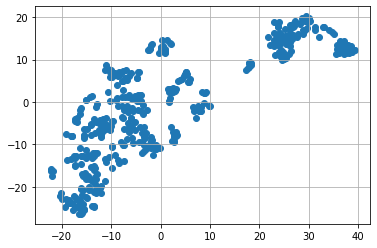

In [36]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.grid()
plt.show()

## Задание 2
1. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.
2. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
3. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
4. Вычислите средние значения price и CRIM в разных кластерах.

In [37]:
from sklearn.cluster import KMeans

In [38]:
model = KMeans(n_clusters = 3,max_iter = 100, random_state = 42)

In [39]:
train_labels = model.fit_predict(X_train_scal)

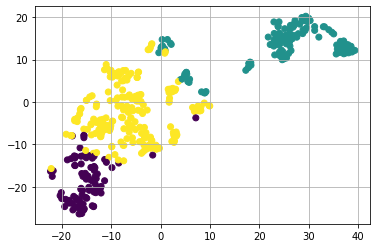

In [40]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.grid()
plt.show()

In [55]:
print('первый кластер - средняя цена: ', y_train[train_labels == 0].mean())
print('первый кластер - средний уровень преступности: ', X_train.loc[train_labels == 0, 'CRIM'].mean())
print('*' * 100)
print('втортой кластер - средняя цена: ', y_train[train_labels == 1].mean())
print('втортой кластер - средний уровень преступности: ', X_train.loc[train_labels == 1, 'CRIM'].mean())
print('*' * 100)
print('третий кластер - средняя цена: ', y_train[train_labels == 2].mean())
print('третий кластер - средний уровень преступности: ', X_train.loc[train_labels == 2, 'CRIM'].mean())

первый кластер - средняя цена:  27.78837209302326
первый кластер - средний уровень преступности:  0.07356558139534886
****************************************************************************************************
втортой кластер - средняя цена:  16.165354330708663
втортой кластер - средний уровень преступности:  10.797028425196853
****************************************************************************************************
третий кластер - средняя цена:  24.958115183246072
третий кластер - средний уровень преступности:  0.42166020942408367


## Задание 3
1. Примените модель KMeans, построенную в предыдущем задании к данным из тестового набора.
2. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [57]:
labels_test = model.fit_predict(X_test_scaled)

In [58]:
print('тест_первый кластер - средняя цена: ', y_test[labels_test == 0].mean())
print('тест_первый кластер - средний уровень преступности: ', X_test.loc[labels_test == 0, 'CRIM'].mean())
print('*' * 100)
print('втортой кластер - средняя цена: ', y_test[labels_test == 0].mean())
print('втортой кластер - средний уровень преступности: ', X_test.loc[labels_test == 0, 'CRIM'].mean())
print('*' * 100)
print('третий кластер - средняя цена: ', y_test[labels_test == 0].mean())
print('третий кластер - средний уровень преступности: ', X_test.loc[labels_test == 0, 'CRIM'].mean())

тест_первый кластер - средняя цена:  33.871428571428574
тест_первый кластер - средний уровень преступности:  0.08618571428571427
****************************************************************************************************
втортой кластер - средняя цена:  33.871428571428574
втортой кластер - средний уровень преступности:  0.08618571428571427
****************************************************************************************************
третий кластер - средняя цена:  33.871428571428574
третий кластер - средний уровень преступности:  0.08618571428571427
